In [1]:
"""Scott Thomas Andersen -- Module 5 Check-in -- ATMS 523."""

'Scott Thomas Andersen -- Module 5 Check-in -- ATMS 523.'

# Homework: Compare Two Logistic Regression Models (Weather & Climate)

**Compare the performance of two logistic regression models**  
- **Model A (Full):** `CAPE`, `PWAT`, `Shear`  
- **Model B (Reduced):** `CAPE`, only

Does the three parameter model work better than the one parameter model?

**Tasks**
1. Split data into train/test.
2. Fit both models.
3. Compute **accuracy**, **precision**, **recall** at threshold 0.5.
4. Plot **ROC** and **Precision–Recall** curves for both models on the same figures.
5. Answer the interpretation questions.


In [2]:
# Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             RocCurveDisplay, PrecisionRecallDisplay,
                             roc_curve, precision_recall_curve, auc)

FEATURES_FULL = ['cape', 'pwat', 'shear']
FEATURES_REDUCED = ['cape']
TARGET = 'event'

# Synthetic fallback
USE_SYNTHETIC = True

if USE_SYNTHETIC:
    rng = np.random.default_rng(42)
    n = 1200
    cape = rng.gamma(5.0, 250.0, size=n)
    pwat = rng.normal(30, 8, size=n).clip(5, 70)
    shear = rng.normal(15, 6, size=n).clip(0, 40)
    z = -6.0 + 0.0025*cape + 0.06*pwat + 0.05*shear + 0.00002*cape*shear
    p = 1/(1+np.exp(-z))
    y = rng.binomial(1, p)
    df = pd.DataFrame({'cape': cape, 'pwat': pwat, 'shear': shear, 'event': y})
else:
    df = pd.read_csv('../data/your_data.csv').dropna()
    assert TARGET in df.columns
    assert all(c in df.columns for c in FEATURES_FULL)
    df = df[FEATURES_FULL + [TARGET]]
df.head()

,cape,pwat,shear,event
0,1339.091679,24.846334,4.350342,1
1,1620.699558,34.709626,23.376549,1
2,1237.079261,26.431445,20.809474,1
3,1157.616507,37.841527,29.506833,1
4,1708.955858,32.249385,6.662860,1


## 1) Train/Test Split

In [3]:
X_full = df[FEATURES_FULL].values
X_reduced = df[FEATURES_REDUCED].values
y = df[TARGET].values.astype(int)

# YOUR CODE HERE
Xf_train, Xf_test, yf_train, yf_test = \
    train_test_split(X_full, y, test_size=0.25, random_state=0, stratify=y)
Xr_train, Xr_test, yr_train, yr_test = \
    train_test_split(X_reduced, y, test_size=0.25, random_state=0, stratify=y)

len(Xf_train), len(Xf_test)

(900, 300)

## 2) Fit Both Logistic Regression Models

In [4]:
clf_full = LogisticRegression(max_iter=200).fit(Xf_train, yf_train)
clf_reduced = LogisticRegression(max_iter=200).fit(Xr_train, yr_train)

yprob_full = clf_full.predict_proba(Xf_test)[:, 1]
yprob_reduced = clf_reduced.predict_proba(Xr_test)[:, 1]

clf_full.coef_, clf_reduced.coef_

(array([[0.00294362, 0.0514564 , 0.0928135 ]]), array([[0.00269818]]))

## 3) Metrics at Threshold 0.5

In [5]:
thr = 0.5
ypred_full = (yprob_full >= thr).astype(int)
ypred_reduced = (yprob_reduced >= thr).astype(int)

# TODO: Compute Accuracy, Precision, Recall for both models at threshold 0.5

print("Full metrics")
print(f"Accuracy:  {accuracy_score(ypred_full, yf_test): .3f}")
print(f"Precision: {precision_score(ypred_full, yf_test): .3f}")
print(f"Recall:    {recall_score(ypred_full, yf_test): .3f}\n")

print("Reduced metrics")
print(f"Accuracy:  {accuracy_score(ypred_reduced, yr_test): .3f}")
print(f"Precision: {precision_score(ypred_reduced, yr_test): .3f}")
print(f"Recall:    {recall_score(ypred_reduced, yr_test): .3f}")

Full metrics
Accuracy:   0.723
Precision:  0.678
Recall:     0.733

Reduced metrics
Accuracy:   0.717
Precision:  0.651
Recall:     0.736


## 4) Plot ROC and Precision–Recall Curves

Full data ROC curve and PR curve
ROC AUC:  0.722
PR AUC:  0.297


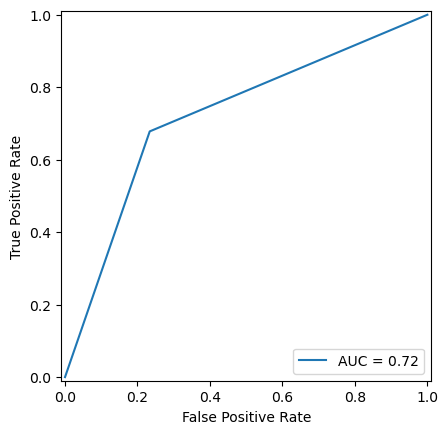

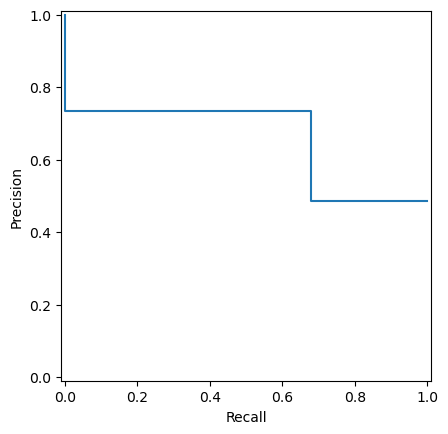

In [6]:
# TODO: Plot ROC and PR curves for both models on shared axes
# accuracy_score, precision_score, recall_score,
# RocCurveDisplay, PrecisionRecallDisplay

print("Full data ROC curve and PR curve")
# I used the documentation here for the ROC Curve:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html
fpr, tpr, _ = roc_curve(yf_test, ypred_full)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

# and precision and recall I took from here:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.PrecisionRecallDisplay.html
precision, recall, _ = precision_recall_curve(yf_test, ypred_full)
pr_auc = auc(precision, recall)
PrecisionRecallDisplay(precision=precision, recall=recall).plot()
print(f"ROC AUC: {roc_auc: .3f}")
print(f"PR AUC: {pr_auc: .3f}")

Reduced data ROC curve and PR curve
ROC AUC:  0.715
PR AUC:  0.292


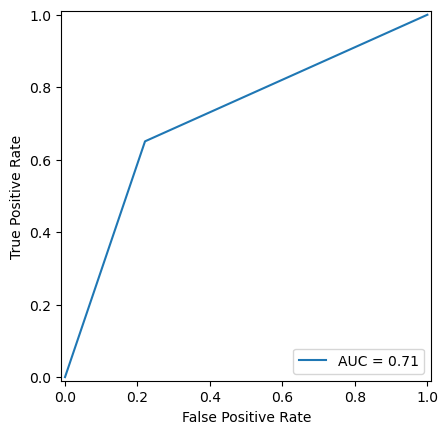

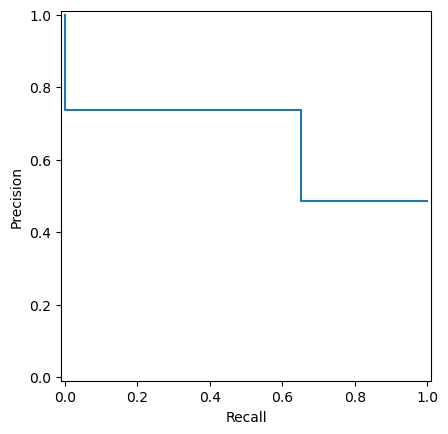

In [7]:
# reduced data
print("Reduced data ROC curve and PR curve")
fpr, tpr, _ = roc_curve(yr_test, ypred_reduced)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
precision, recall, _ = precision_recall_curve(yr_test, ypred_reduced)
pr_auc = auc(precision, recall)
PrecisionRecallDisplay(precision=precision, recall=recall).plot()
print(f"ROC AUC: {roc_auc: .3f}")
print(f"PR AUC: {pr_auc: .3f}")

## 5) Interpretation

1. Which model has higher **ROC-AUC** and **PR-AUC**? What does this imply about `PWAT`?  
2. Compare **accuracy**, **precision**, and **recall** for both models.  
   - Which model would you choose to **maximize event detection** (recall)?  
   - Which model would you choose to **minimize false alarms** (precision)?  

The full model has the following values:
- ROC-AUC:   0.722
- PR-AUC:    0.297
- Precision: 0.723
- Recall:    0.678
- Accuracy:  0.733

The reduced model has the following values:
- ROC-AUC:   0.715
- PR-AUC:    0.292
- Precision: 0.717
- Recall:    0.651
- Accuracy:  0.736

1. Which model has higher **ROC-AUC** and **PR-AUC**? What does this imply about `PWAT`?
   The full model has slightly better AUC's than the reduced model. This tells us that there is some information in the shear and PWAT that allows for more positive events to be detected.

2. The accuracy, recall and precision metrics are listed above for the two models.

The model that maximizes the event detection is the full model, more positive events are correctly identified for this event than the reduced model. Meanwhile the precision of the full model is slightly higher than the reduced model as well, precision is the 

That being said, the model that maximizes event detection, the recall, ratio of true positives over all of the positively identified cases, since this is higher we know there is a lower rate of false positive cases in the full model.